In [121]:
import numpy as np
import h5py
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

dir = os.getcwd()

adata = sc.read_10x_mtx(dir + "\\data\\GEO1\\raw_feature_bc_matrix")
adata.var_names_make_unique()
pos = sc.read_csv(dir + "\\data\\GEO1\\spatial\\tissue_positions_list.csv")

In [122]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [123]:
adata

AnnData object with n_obs × n_vars = 439 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [124]:
adata.var

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
FAM138A,ENSG00000237613,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,False,7,0.015945,0.015820,98.405467,7.0,2.079442
AL627309.3,ENSG00000239945,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC023491.2,ENSG00000278633,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC007325.1,ENSG00000276017,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC007325.4,ENSG00000278817,Gene Expression,False,39,0.091116,0.087201,91.116173,40.0,3.713572


In [125]:
import pandas as pd
mit = pd.DataFrame(adata.var)
mit.loc[mit["mt"]==True]

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MT-ND1,ENSG00000198888,Gene Expression,True,439,32.485195,3.511103,0.000000,14261.0,9.565354
MT-ND2,ENSG00000198763,Gene Expression,True,438,15.738041,2.817684,0.227790,6909.0,8.840725
MT-CO1,ENSG00000198804,Gene Expression,True,439,76.273346,4.347349,0.000000,33484.0,10.418853
MT-CO2,ENSG00000198712,Gene Expression,True,439,114.658318,4.750640,0.000000,50335.0,10.826476
MT-ATP8,ENSG00000228253,Gene Expression,True,134,0.480638,0.392473,69.476082,211.0,5.356586
MT-ATP6,ENSG00000198899,Gene Expression,True,439,43.908882,3.804636,0.000000,19276.0,9.866668
MT-CO3,ENSG00000198938,Gene Expression,True,439,67.521637,4.227149,0.000000,29642.0,10.296981
MT-ND3,ENSG00000198840,Gene Expression,True,439,25.774487,3.287449,0.000000,11315.0,9.333973
MT-ND4L,ENSG00000212907,Gene Expression,True,208,0.888383,0.635721,52.619590,390.0,5.968708
MT-ND4,ENSG00000198886,Gene Expression,True,439,47.929386,3.890378,0.000000,21041.0,9.954276


C:\Users\pedro\AppData\Local\Temp\ipykernel_19728\1125004840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
C:\Users\pedro\AppData\Local\Temp\ipykernel_19728\1125004840.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_coun

<Axes: xlabel='n_genes_by_counts'>

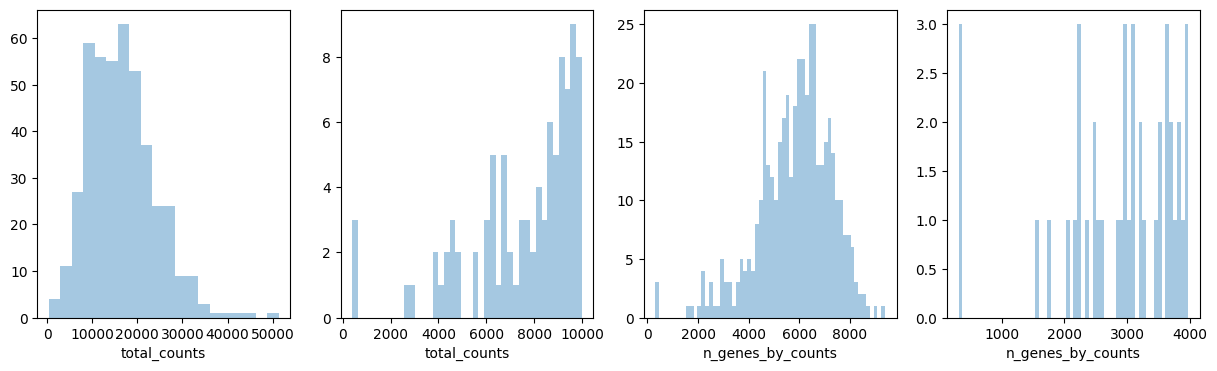

In [126]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [127]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

#cells after MT filter: 418


c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


C:\Users\pedro\AppData\Local\Temp\ipykernel_19728\1125004840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
C:\Users\pedro\AppData\Local\Temp\ipykernel_19728\1125004840.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_coun

<Axes: xlabel='n_genes_by_counts'>

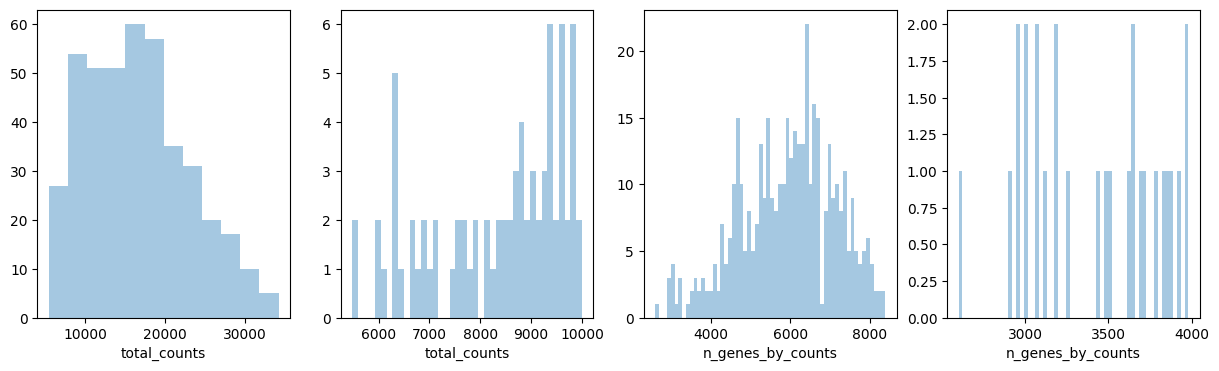

In [128]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [129]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [130]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


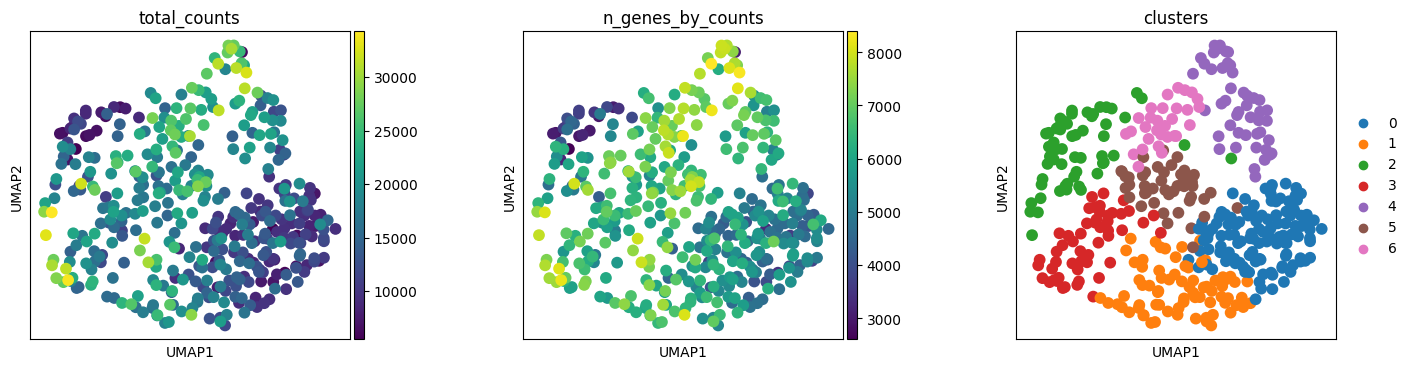

In [131]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

In [137]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color=["total_counts", "n_genes_by_counts"], scale_factor=dir + "\\data\\GEO1\\spatial\\scalefactors_json.json", spot_size=pos, img = dir + "\\data\\GEO1\\spatial\\II21472_tissue_hires_image.png")

TypeError: can't multiply sequence by non-int of type 'float'

In [135]:
adata.var_names

Index(['LINC01409', 'LINC01128', 'LINC00115', 'FAM41C', 'LINC02593', 'SAMD11',
       'NOC2L', 'KLHL17', 'PLEKHN1', 'AL645608.7',
       ...
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB', 'MAFIP',
       'AC011043.1', 'AL354822.1', 'AC007325.4'],
      dtype='object', length=15108)

In [57]:
sc.read(dir + "\\data\\GEO1\\raw_feature_bc_matrix")

ValueError: Reading with filekey 'c:\\Users\\pedro\\OneDrive\\Área de Trabalho\\Spatial_Ovary\\data\\GEO1\\raw_feature_bc_matrix' failed, the inferred filename WindowsPath('c:/Users/pedro/OneDrive/Área de Trabalho/Spatial_Ovary/data/GEO1/raw_feature_bc_matrix.h5ad') does not exist. If you intended to provide a filename, either use a filename ending on one of the available extensions {'anndata', 'tsv', 'tab', 'loom', 'h5', 'txt', 'data', 'csv', 'mtx.gz', 'mtx', 'h5ad', 'soft.gz', 'xlsx'} or pass the parameter `ext`.

In [52]:
adata = sc.read_text(dir + "\\data\\GEO1\\raw_feature_bc_matrix\\barcodes.tsv.gz")
adata.obs

""
AAACTGCTGGCTCCAA-1
AAACTTGCAAACGTAT-1
AAAGGCTCTCGCGCCG-1
AAATACCTATAAGCAT-1
AAATCGTGTACCACAA-1
...
TTGTGGTAGGAGGGAT-1
TTGTGTATGCCACCAA-1
TTGTGTTTCCCGAAAG-1
TTGTTTCACATCCAGG-1


In [43]:
sc.read_text(dir + "\\data\\GEO1\\raw_feature_bc_matrix\\features.tsv.gz", delimiter="\t", first_column_names=False, dtype="str")

AnnData object with n_obs × n_vars = 36600 × 2

In [44]:
sc.read_csv(dir + "\\data\\GEO1\\spatial\\tissue_positions_list.csv", first_column_names=False)

AnnData object with n_obs × n_vars = 4992 × 5

In [11]:
import os
print(os.getcwd())
os.chdir("c:Users/pedro/OneDrive/Área de Trabalho/Spatial_Ovary/")

c:\Users\pedro\OneDrive\Área de Trabalho\Spatial_Ovary
